# Chapter 4

https://www.nltk.org/book/ch04.html

In [1]:
import nltk
from nltk import * 

In [2]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
longest

'unextinguishable'

In [4]:
maxlen = max(len(word) for word in text)
maxlen

16

In [5]:
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

In [29]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn
from networkx.drawing.nx_agraph import graphviz_layout

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

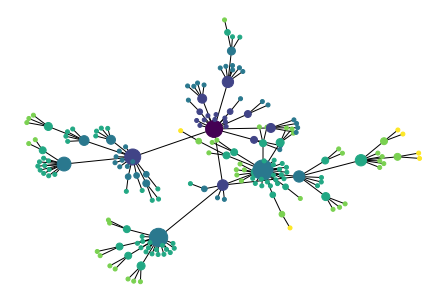

In [34]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

In [36]:
wn.synset('dog.n.01').lemma_names()

['dog', 'domestic_dog', 'Canis_familiaris']

In [40]:
types_of_dogs = dog.hyponyms()
types_of_dogs

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [41]:
sorted(lemma.name() for synset in types_of_dogs for lemma in synset.lemmas())

['Belgian_griffon',
 'Brussels_griffon',
 'Great_Pyrenees',
 'Leonberg',
 'Mexican_hairless',
 'Newfoundland',
 'Newfoundland_dog',
 'Welsh_corgi',
 'barker',
 'basenji',
 'bow-wow',
 'carriage_dog',
 'coach_dog',
 'corgi',
 'cur',
 'dalmatian',
 'doggie',
 'doggy',
 'griffon',
 'hunting_dog',
 'lapdog',
 'mongrel',
 'mutt',
 'pooch',
 'poodle',
 'poodle_dog',
 'pug',
 'pug-dog',
 'puppy',
 'spitz',
 'toy',
 'toy_dog',
 'working_dog']

In [42]:
wn.synset('corgi.n.01').lemma_names()

['corgi', 'Welsh_corgi']

In [43]:
wn.synset('dalmatian.n.02').lemma_names()

['dalmatian', 'coach_dog', 'carriage_dog']

In [44]:
wn.synset('griffon.n.02').lemma_names()

['griffon', 'Brussels_griffon', 'Belgian_griffon']

In [49]:
wn.synsets('corgi')

[Synset('corgi.n.01')]

In [51]:
wn.synset('corgi.n.01').definition()

'either of two Welsh breeds of long-bodied short-legged dogs with erect ears and a fox-like head'